In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import time
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import NearMiss
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
df = pd.read_csv("data.csv")

In [33]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [35]:
df.shape

(569, 33)

In [36]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [37]:
df.drop(['Unnamed: 32','id'], axis = 1 , inplace=True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [38]:
df.diagnosis.replace({"M":1,"B":0},inplace=True)
df.diagnosis.unique()

array([1, 0])

# ***Numerical And Categorical Features***

In [39]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # Catgeorical Variable Selection
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if
                   dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8", "int64", "float64"]]
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Numerical Variable Selection
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [40]:
# Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")


Observations: 569
Variables: 31
Cat_cols: 1
Num_cols: 30
Cat_but_car: 0


   diagnosis     Ration
0        357  62.741652
1        212  37.258348
##########################################


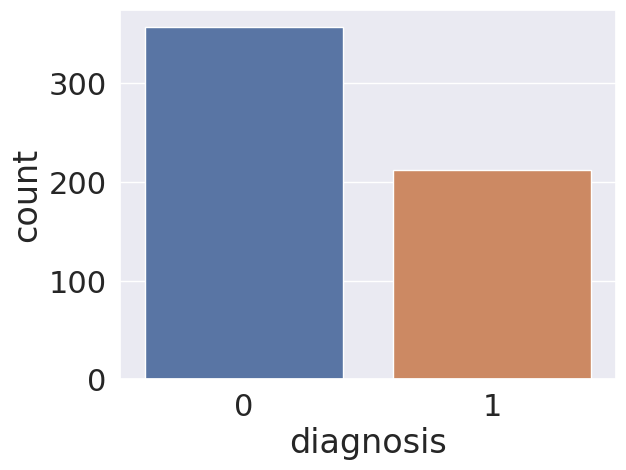

None


In [41]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ration': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


def cat_summary_df(dataframe):
    cat_cols, num_cols, cat_but_car = grab_col_names(df)
    for col in cat_cols:
        cat_summary(dataframe, col, plot=True)

print(cat_summary_df(df))

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
1%         8.458360
5%         9.529200
10%       10.260000
20%       11.366000
30%       12.012000
40%       12.726000
50%       13.370000
60%       14.058000
70%       15.056000
80%       17.068000
90%       19.530000
95%       20.576000
99%       24.371600
max       28.110000
Name: radius_mean, dtype: float64


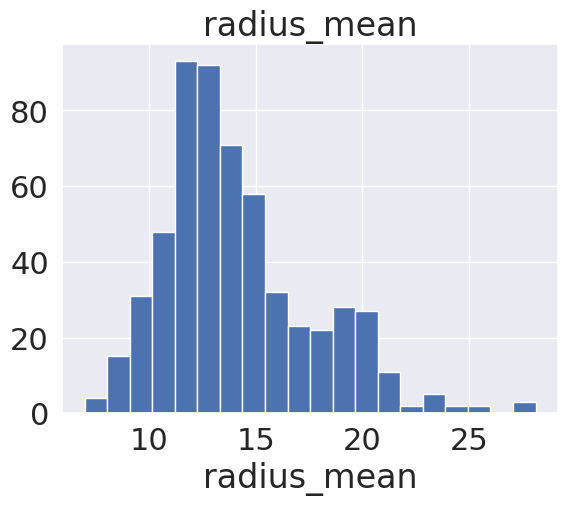

count    569.000000
mean      19.289649
std        4.301036
min        9.710000
1%        10.930400
5%        13.088000
10%       14.078000
20%       15.656000
30%       16.840000
40%       17.912000
50%       18.840000
60%       19.968000
70%       21.272000
80%       22.440000
90%       24.992000
95%       27.150000
99%       30.652000
max       39.280000
Name: texture_mean, dtype: float64


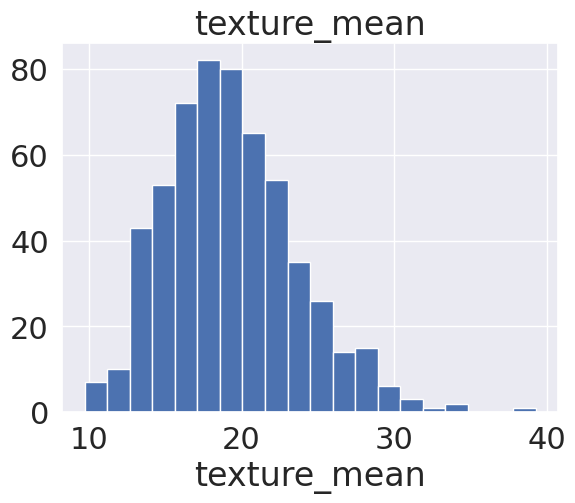

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
1%        53.827600
5%        60.496000
10%       65.830000
20%       73.292000
30%       77.360000
40%       81.938000
50%       86.240000
60%       91.420000
70%       98.200000
80%      111.680000
90%      129.100000
95%      135.820000
99%      165.724000
max      188.500000
Name: perimeter_mean, dtype: float64


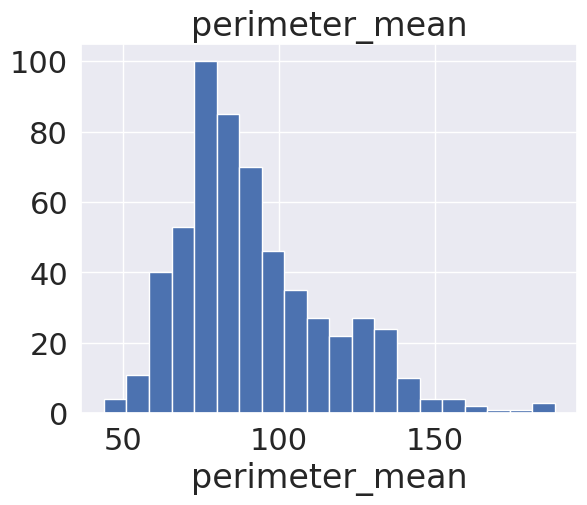

count     569.000000
mean      654.889104
std       351.914129
min       143.500000
1%        215.664000
5%        275.780000
10%       321.600000
20%       396.560000
30%       444.060000
40%       496.440000
50%       551.100000
60%       609.740000
70%       700.660000
80%       915.060000
90%      1177.400000
95%      1309.800000
99%      1786.600000
max      2501.000000
Name: area_mean, dtype: float64


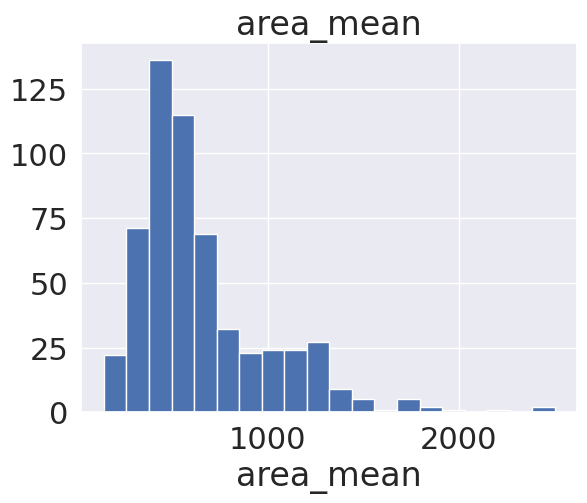

count    569.000000
mean       0.096360
std        0.014064
min        0.052630
1%         0.068654
5%         0.075042
10%        0.079654
20%        0.084206
30%        0.087914
40%        0.091828
50%        0.095870
60%        0.099338
70%        0.103260
80%        0.107500
90%        0.114820
95%        0.118780
99%        0.132888
max        0.163400
Name: smoothness_mean, dtype: float64


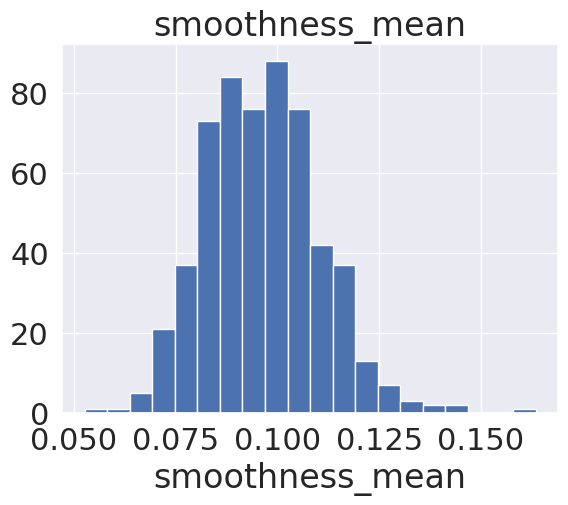

count    569.000000
mean       0.104341
std        0.052813
min        0.019380
1%         0.033351
5%         0.040660
10%        0.049700
20%        0.059638
30%        0.070390
40%        0.079530
50%        0.092630
60%        0.108740
70%        0.122420
80%        0.141900
90%        0.175460
95%        0.208700
99%        0.277192
max        0.345400
Name: compactness_mean, dtype: float64


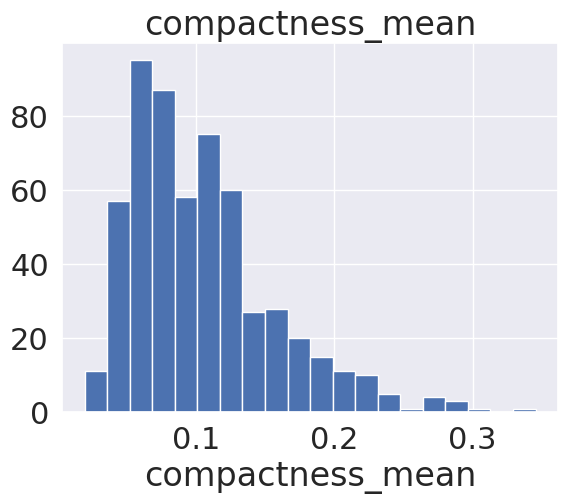

count    569.000000
mean       0.088799
std        0.079720
min        0.000000
1%         0.000000
5%         0.004983
10%        0.013686
20%        0.024930
30%        0.034400
40%        0.045070
50%        0.061540
60%        0.086212
70%        0.111920
80%        0.149780
90%        0.203040
95%        0.243020
99%        0.351688
max        0.426800
Name: concavity_mean, dtype: float64


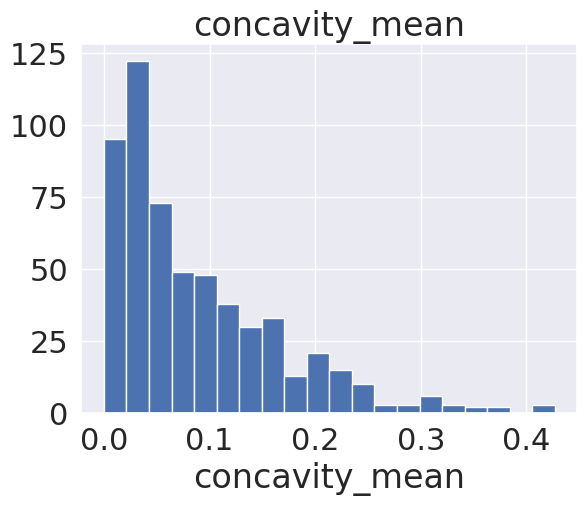

count    569.000000
mean       0.048919
std        0.038803
min        0.000000
1%         0.000000
5%         0.005621
10%        0.011158
20%        0.017866
30%        0.022788
40%        0.027982
50%        0.033500
60%        0.048318
70%        0.064496
80%        0.084254
90%        0.100420
95%        0.125740
99%        0.164208
max        0.201200
Name: concave points_mean, dtype: float64


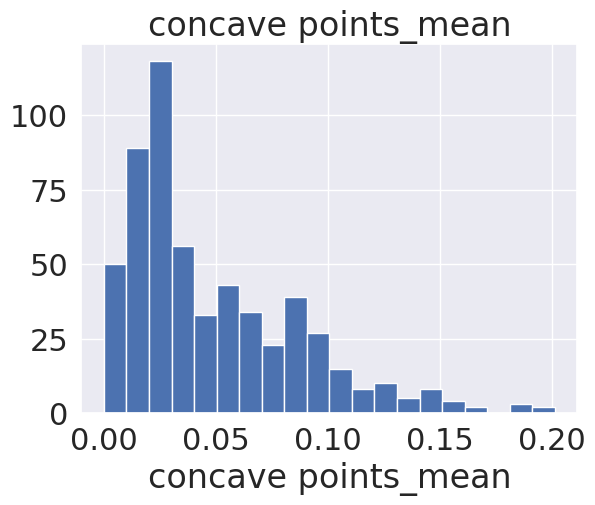

count    569.000000
mean       0.181162
std        0.027414
min        0.106000
1%         0.129508
5%         0.141500
10%        0.149580
20%        0.158760
30%        0.165080
40%        0.172000
50%        0.179200
60%        0.185480
70%        0.192800
80%        0.200540
90%        0.214940
95%        0.230720
99%        0.259564
max        0.304000
Name: symmetry_mean, dtype: float64


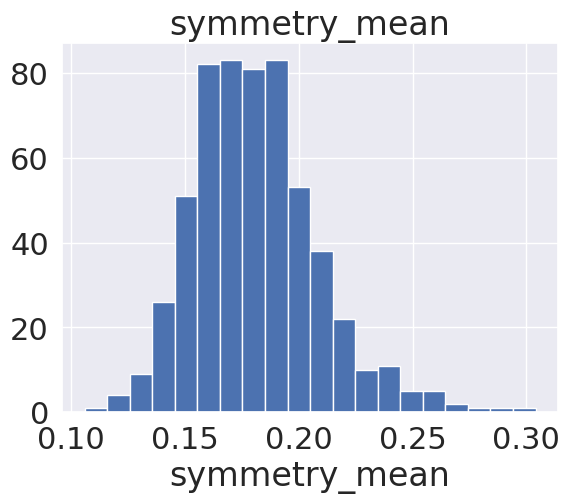

count    569.000000
mean       0.062798
std        0.007060
min        0.049960
1%         0.051504
5%         0.053926
10%        0.055338
20%        0.056864
30%        0.058840
40%        0.060204
50%        0.061540
60%        0.063148
70%        0.065048
80%        0.067630
90%        0.072266
95%        0.076090
99%        0.085438
max        0.097440
Name: fractal_dimension_mean, dtype: float64


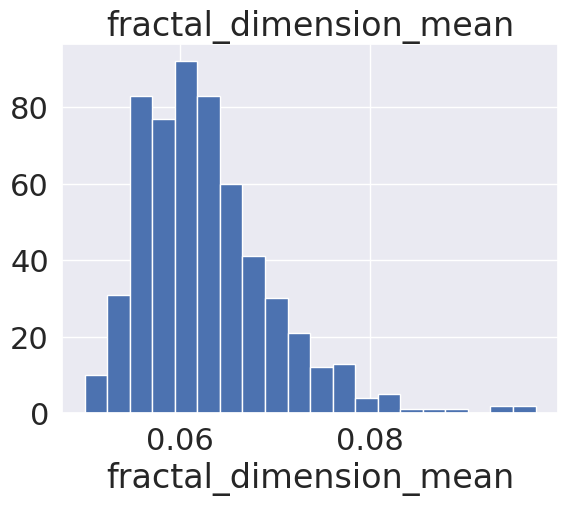

count    569.000000
mean       0.405172
std        0.277313
min        0.111500
1%         0.119740
5%         0.160100
10%        0.183080
20%        0.219280
30%        0.246040
40%        0.280200
50%        0.324200
60%        0.369460
70%        0.431020
80%        0.546140
90%        0.748880
95%        0.959520
99%        1.291320
max        2.873000
Name: radius_se, dtype: float64


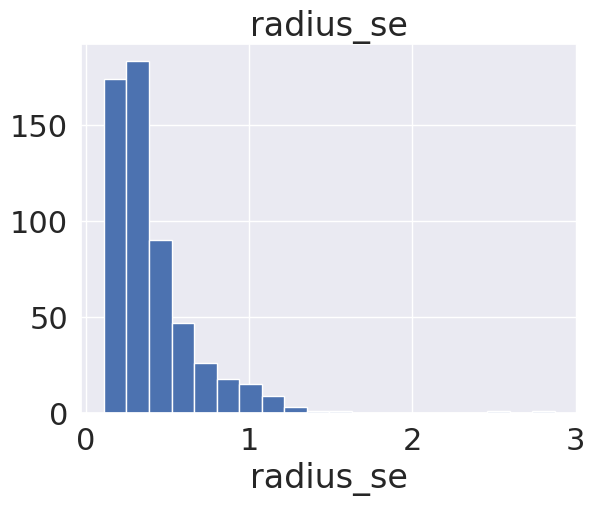

count    569.000000
mean       1.216853
std        0.551648
min        0.360200
1%         0.410548
5%         0.540140
10%        0.640400
20%        0.780600
30%        0.902100
40%        1.005200
50%        1.108000
60%        1.238800
70%        1.388200
80%        1.561200
90%        1.909400
95%        2.212000
99%        2.915440
max        4.885000
Name: texture_se, dtype: float64


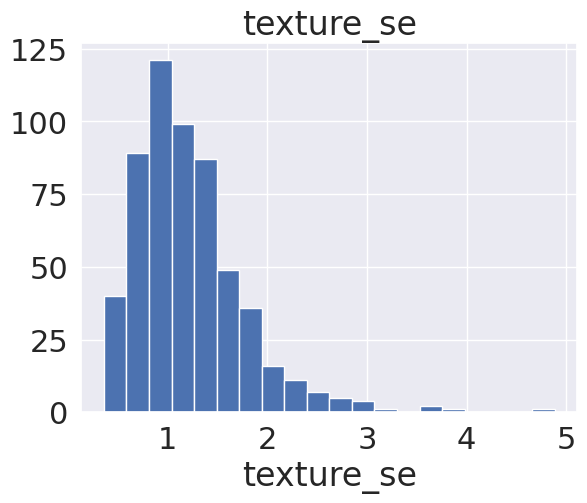

count    569.000000
mean       2.866059
std        2.021855
min        0.757000
1%         0.953248
5%         1.132800
10%        1.280200
20%        1.516600
30%        1.740800
40%        2.039400
50%        2.287000
60%        2.590800
70%        3.050200
80%        3.767800
90%        5.123200
95%        7.041600
99%        9.690040
max       21.980000
Name: perimeter_se, dtype: float64


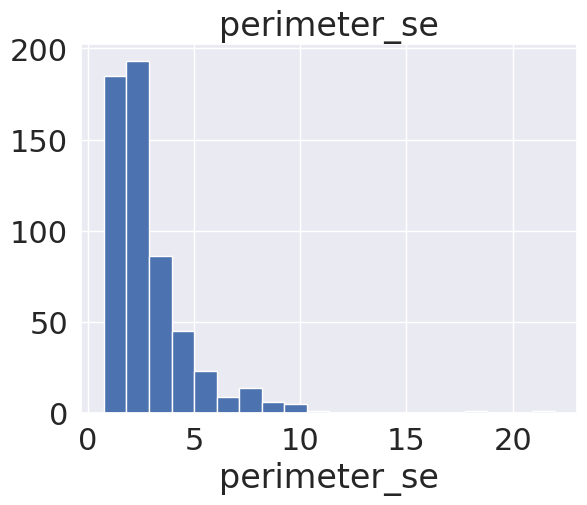

count    569.000000
mean      40.337079
std       45.491006
min        6.802000
1%         8.514440
5%        11.360000
10%       13.160000
20%       16.640000
30%       19.038000
40%       21.078000
50%       24.530000
60%       29.322000
70%       38.430000
80%       54.088000
90%       91.314000
95%      115.800000
99%      177.684000
max      542.200000
Name: area_se, dtype: float64


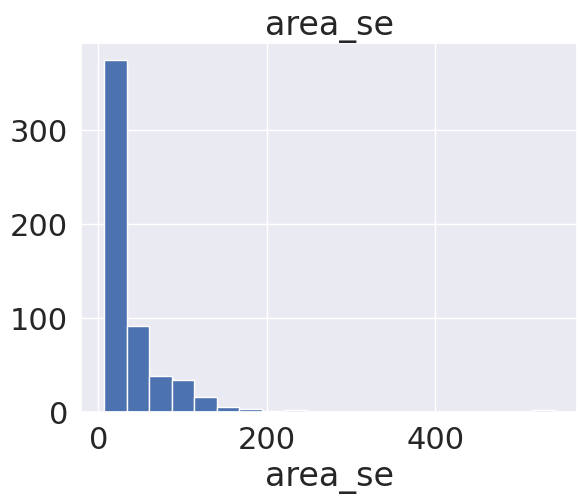

count    569.000000
mean       0.007041
std        0.003003
min        0.001713
1%         0.003058
5%         0.003690
10%        0.004224
20%        0.004871
30%        0.005417
40%        0.005843
50%        0.006380
60%        0.006944
70%        0.007773
80%        0.008828
90%        0.010410
95%        0.012644
99%        0.017258
max        0.031130
Name: smoothness_se, dtype: float64


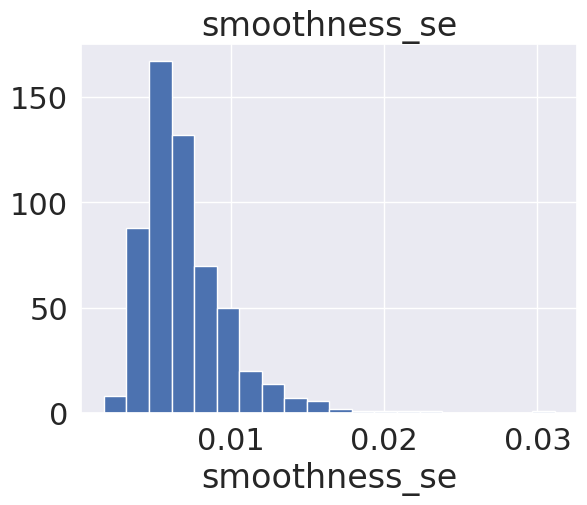

count    569.000000
mean       0.025478
std        0.017908
min        0.002252
1%         0.004705
5%         0.007892
10%        0.009169
20%        0.011800
30%        0.014240
40%        0.017020
50%        0.020450
60%        0.024480
70%        0.030136
80%        0.036198
90%        0.047602
95%        0.060578
99%        0.089872
max        0.135400
Name: compactness_se, dtype: float64


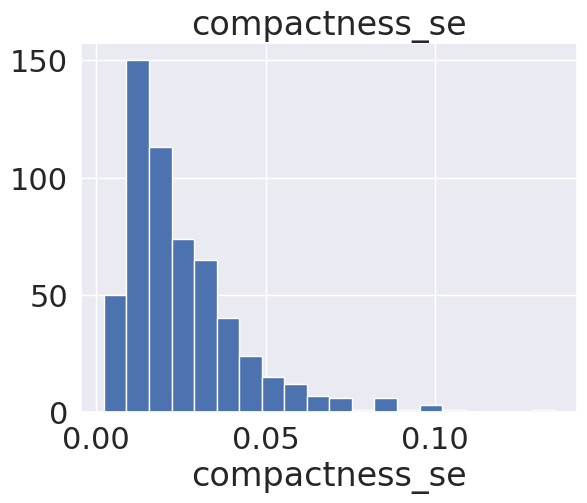

count    569.000000
mean       0.031894
std        0.030186
min        0.000000
1%         0.000000
5%         0.003253
10%        0.007726
20%        0.013212
30%        0.016980
40%        0.020456
50%        0.025890
60%        0.030544
70%        0.037362
80%        0.046404
90%        0.058520
95%        0.078936
99%        0.122292
max        0.396000
Name: concavity_se, dtype: float64


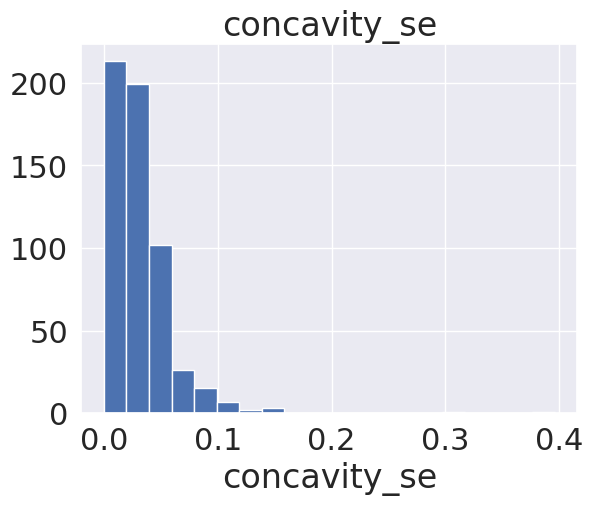

count    569.000000
mean       0.011796
std        0.006170
min        0.000000
1%         0.000000
5%         0.003831
10%        0.005493
20%        0.006893
30%        0.008465
40%        0.009617
50%        0.010930
60%        0.012410
70%        0.013700
80%        0.015812
90%        0.018688
95%        0.022884
99%        0.031194
max        0.052790
Name: concave points_se, dtype: float64


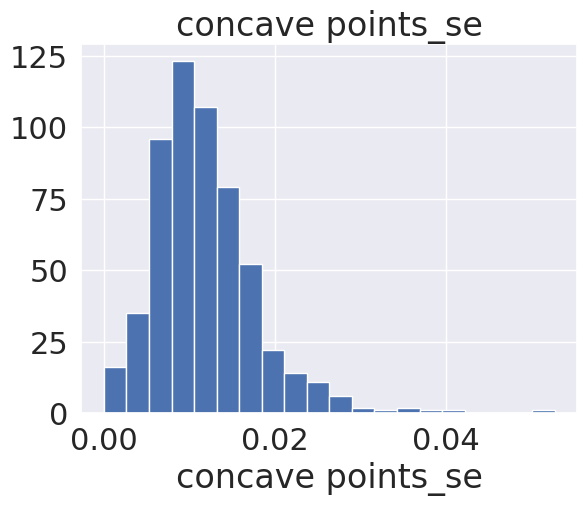

count    569.000000
mean       0.020542
std        0.008266
min        0.007882
1%         0.010547
5%         0.011758
10%        0.013012
20%        0.014540
30%        0.015704
40%        0.017170
50%        0.018730
60%        0.020066
70%        0.021978
80%        0.025680
90%        0.030120
95%        0.034988
99%        0.052208
max        0.078950
Name: symmetry_se, dtype: float64


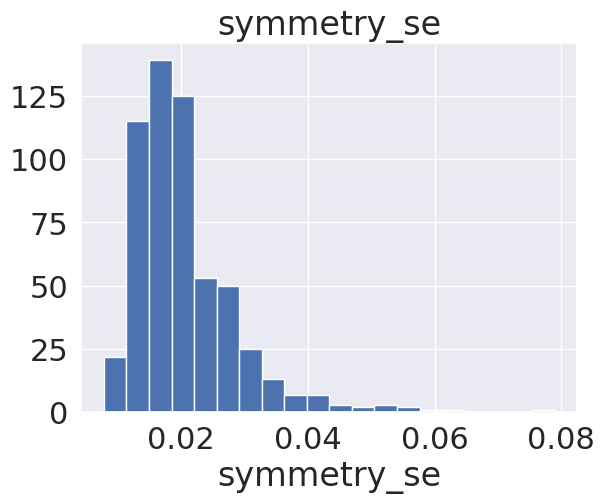

count    569.000000
mean       0.003795
std        0.002646
min        0.000895
1%         0.001114
5%         0.001522
10%        0.001710
20%        0.002057
30%        0.002382
40%        0.002752
50%        0.003187
60%        0.003611
70%        0.004172
80%        0.004830
90%        0.006185
95%        0.007960
99%        0.012650
max        0.029840
Name: fractal_dimension_se, dtype: float64


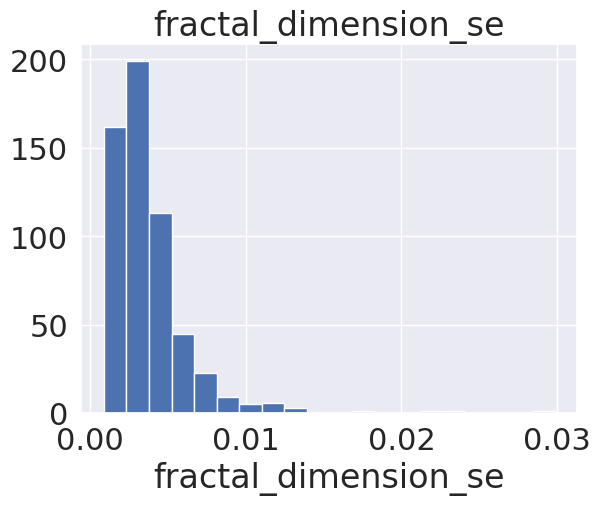

count    569.000000
mean      16.269190
std        4.833242
min        7.930000
1%         9.207600
5%        10.534000
10%       11.234000
20%       12.498000
30%       13.314000
40%       14.008000
50%       14.970000
60%       16.004000
70%       17.386000
80%       20.294000
90%       23.682000
95%       25.640000
99%       30.762800
max       36.040000
Name: radius_worst, dtype: float64


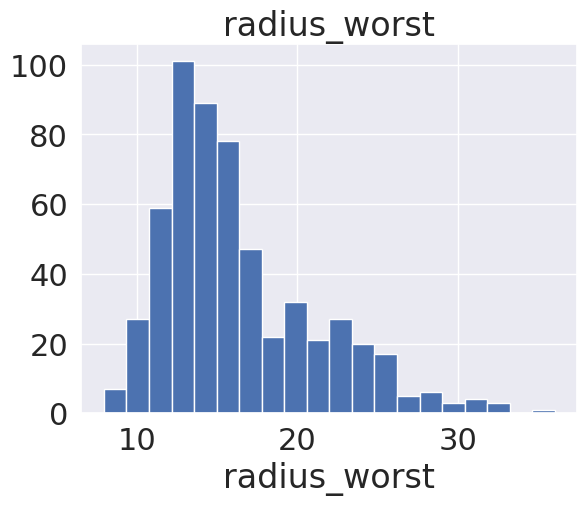

count    569.000000
mean      25.677223
std        6.146258
min       12.020000
1%        15.200800
5%        16.574000
10%       17.800000
20%       20.176000
30%       21.988000
40%       23.584000
50%       25.410000
60%       26.724000
70%       28.460000
80%       30.908000
90%       33.646000
95%       36.300000
99%       41.802400
max       49.540000
Name: texture_worst, dtype: float64


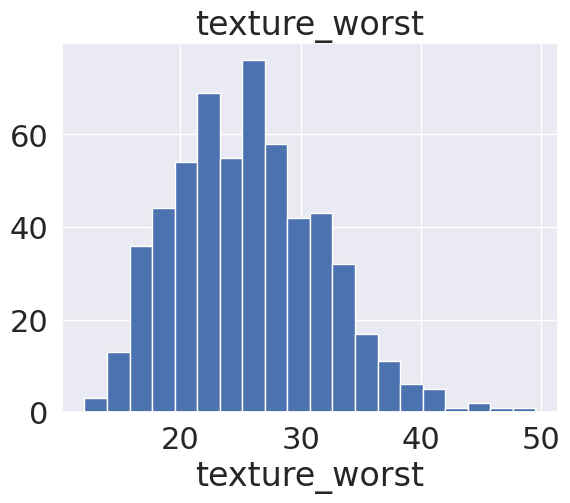

count    569.000000
mean     107.261213
std       33.602542
min       50.410000
1%        58.270400
5%        67.856000
10%       72.178000
20%       81.402000
30%       86.328000
40%       91.304000
50%       97.660000
60%      105.740000
70%      115.900000
80%      133.500000
90%      157.740000
95%      171.640000
99%      208.304000
max      251.200000
Name: perimeter_worst, dtype: float64


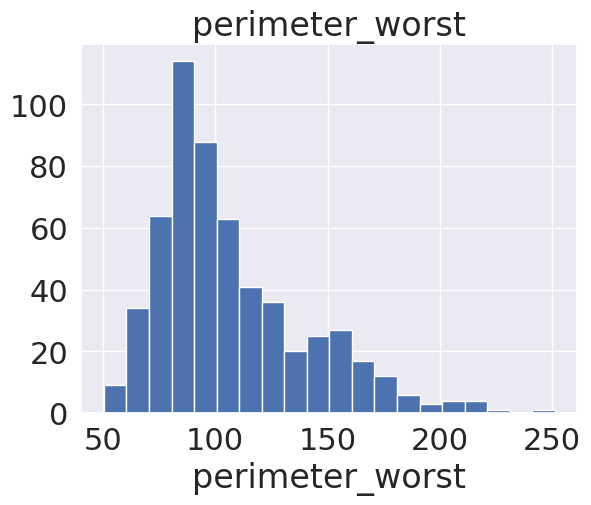

count     569.000000
mean      880.583128
std       569.356993
min       185.200000
1%        256.192000
5%        331.060000
10%       384.720000
20%       475.980000
30%       544.140000
40%       599.700000
50%       686.500000
60%       781.180000
70%       926.960000
80%      1269.000000
90%      1673.000000
95%      2009.600000
99%      2918.160000
max      4254.000000
Name: area_worst, dtype: float64


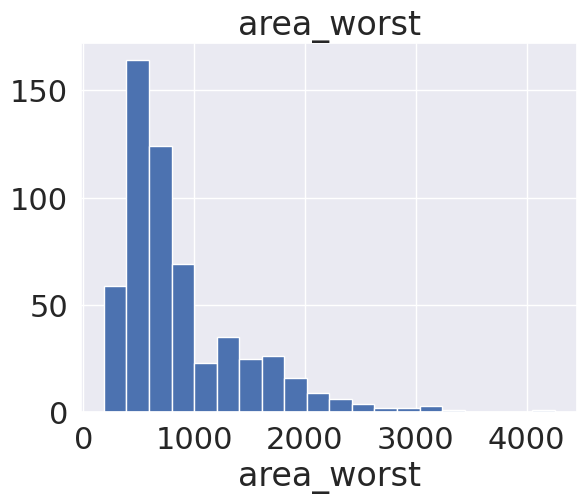

count    569.000000
mean       0.132369
std        0.022832
min        0.071170
1%         0.087910
5%         0.095734
10%        0.102960
20%        0.112520
30%        0.120740
40%        0.126320
50%        0.131300
60%        0.137680
70%        0.142600
80%        0.150080
90%        0.161480
95%        0.171840
99%        0.188908
max        0.222600
Name: smoothness_worst, dtype: float64


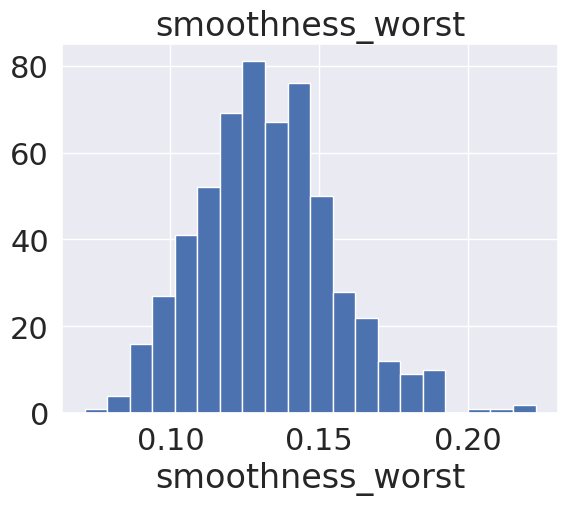

count    569.000000
mean       0.254265
std        0.157336
min        0.027290
1%         0.050094
5%         0.071196
10%        0.093676
20%        0.125660
30%        0.161400
40%        0.184620
50%        0.211900
60%        0.251400
70%        0.303960
80%        0.367060
90%        0.447840
95%        0.564120
99%        0.778644
max        1.058000
Name: compactness_worst, dtype: float64


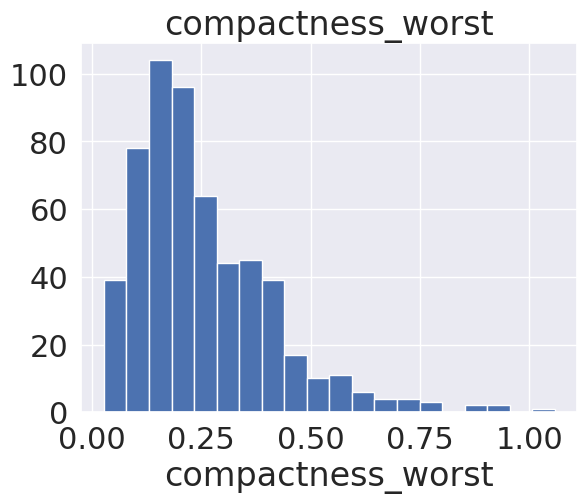

count    569.000000
mean       0.272188
std        0.208624
min        0.000000
1%         0.000000
5%         0.018360
10%        0.045652
20%        0.091974
30%        0.136880
40%        0.177180
50%        0.226700
60%        0.286600
70%        0.349920
80%        0.419540
90%        0.571320
95%        0.682380
99%        0.902380
max        1.252000
Name: concavity_worst, dtype: float64


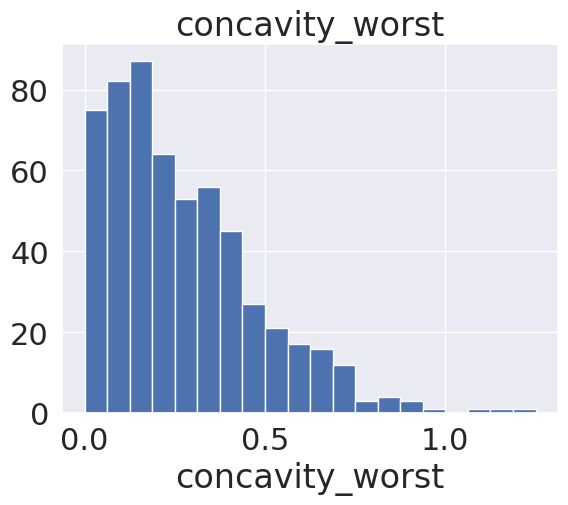

count    569.000000
mean       0.114606
std        0.065732
min        0.000000
1%         0.000000
5%         0.024286
10%        0.038460
20%        0.058086
30%        0.071656
40%        0.083914
50%        0.099930
60%        0.121800
70%        0.150800
80%        0.177540
90%        0.208940
95%        0.236920
99%        0.269216
max        0.291000
Name: concave points_worst, dtype: float64


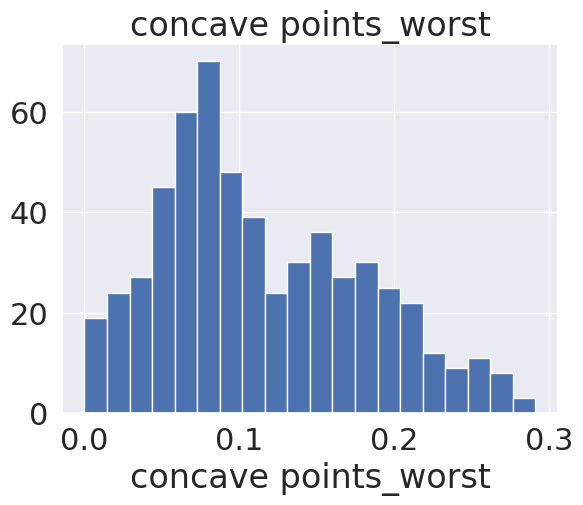

count    569.000000
mean       0.290076
std        0.061867
min        0.156500
1%         0.176028
5%         0.212700
10%        0.226120
20%        0.243620
30%        0.256520
40%        0.269400
50%        0.282200
60%        0.296480
70%        0.310220
80%        0.325380
90%        0.360080
95%        0.406160
99%        0.486908
max        0.663800
Name: symmetry_worst, dtype: float64


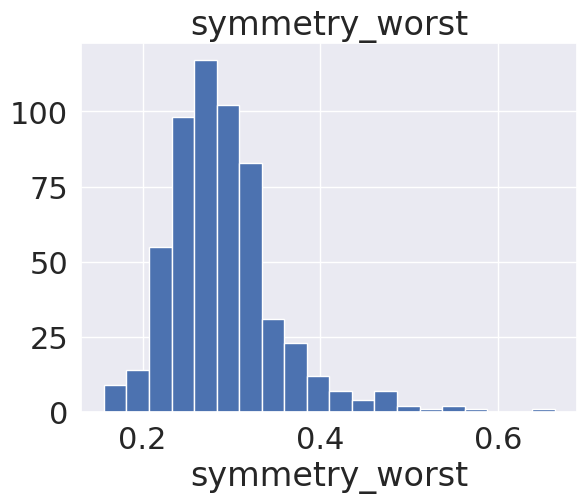

count    569.000000
mean       0.083946
std        0.018061
min        0.055040
1%         0.058580
5%         0.062558
10%        0.065792
20%        0.069654
30%        0.073462
40%        0.076852
50%        0.080040
60%        0.083202
70%        0.088984
80%        0.095934
90%        0.106320
95%        0.119520
99%        0.140628
max        0.207500
Name: fractal_dimension_worst, dtype: float64


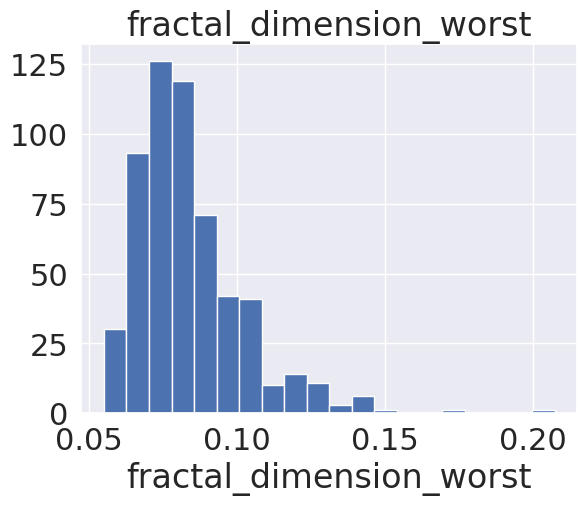

None


In [42]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)

def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

print(num_summary_df(df))

# ***Visualizing Missing Values***

In [43]:
df.isnull()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        False        False         False           False      False   
1        False        False         False           False      False   
2        False        False         False           False      False   
3        False        False         False           False      False   
4        False        False         False           False      False   
..         ...          ...           ...             ...        ...   
564      False        False         False           False      False   
565      False        False         False           False      False   
566      False        False         False           False      False   
567      False        False         False           False      False   
568      False        False         False           False      False   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0              False             False           False                False   
1              False             False           False                False   
2              False             False           False                False   
3              False             False           False                False   
4              False             False           False                False   
..               ...               ...             ...                  ...   
564            False             False           False                False   
565            False             False           False                False   
566            False             False           False                False   
567            False             False           False                False   
568            False             False           False                False   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0            False  ...         False          False            False   
1            False  ...         False          False            False   
2            False  ...         False          False            False   
3            False  ...         False          False            False   
4            False  ...         False          False            False   
..             ...  ...           ...            ...              ...   
564          False  ...         False          False            False   
565          False  ...         False          False            False   
566          False  ...         False          False            False   
567          False  ...         False          False            False   
568          False  ...         False          False            False   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0         False             False              False            False   
1         False             False              False            False   
2         False             False              False            False   
3         False             False              False            False   
4         False             False              False            False   
..          ...               ...                ...              ...   
564       False             False              False            False   
565       False             False              False            False   
566       False             False              False            False   
567       False             False              False            False   
568       False             False              False            False   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                   False           False                    False  
1                   False           False                    False  
2                   False           False                    False  
3                   False           False                    False  
4                   False           False                    False  
..                    .

<Axes: >

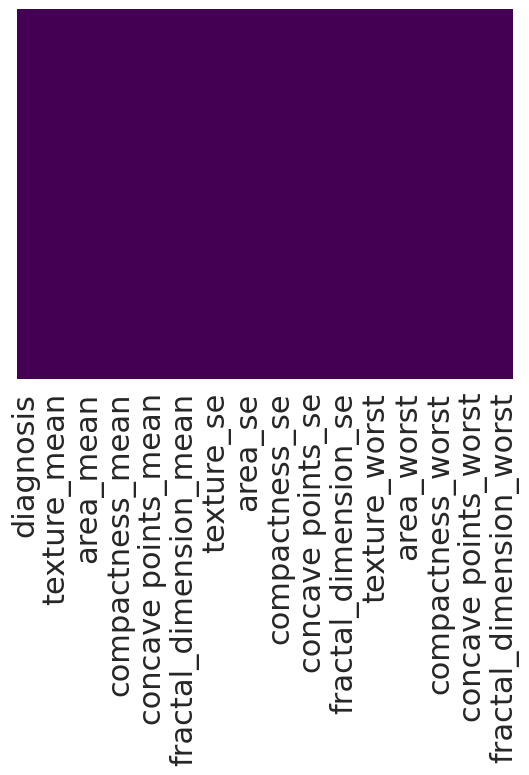

In [44]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# ***Correlation***

Text(0.5, 1.0, 'Correlation Map')

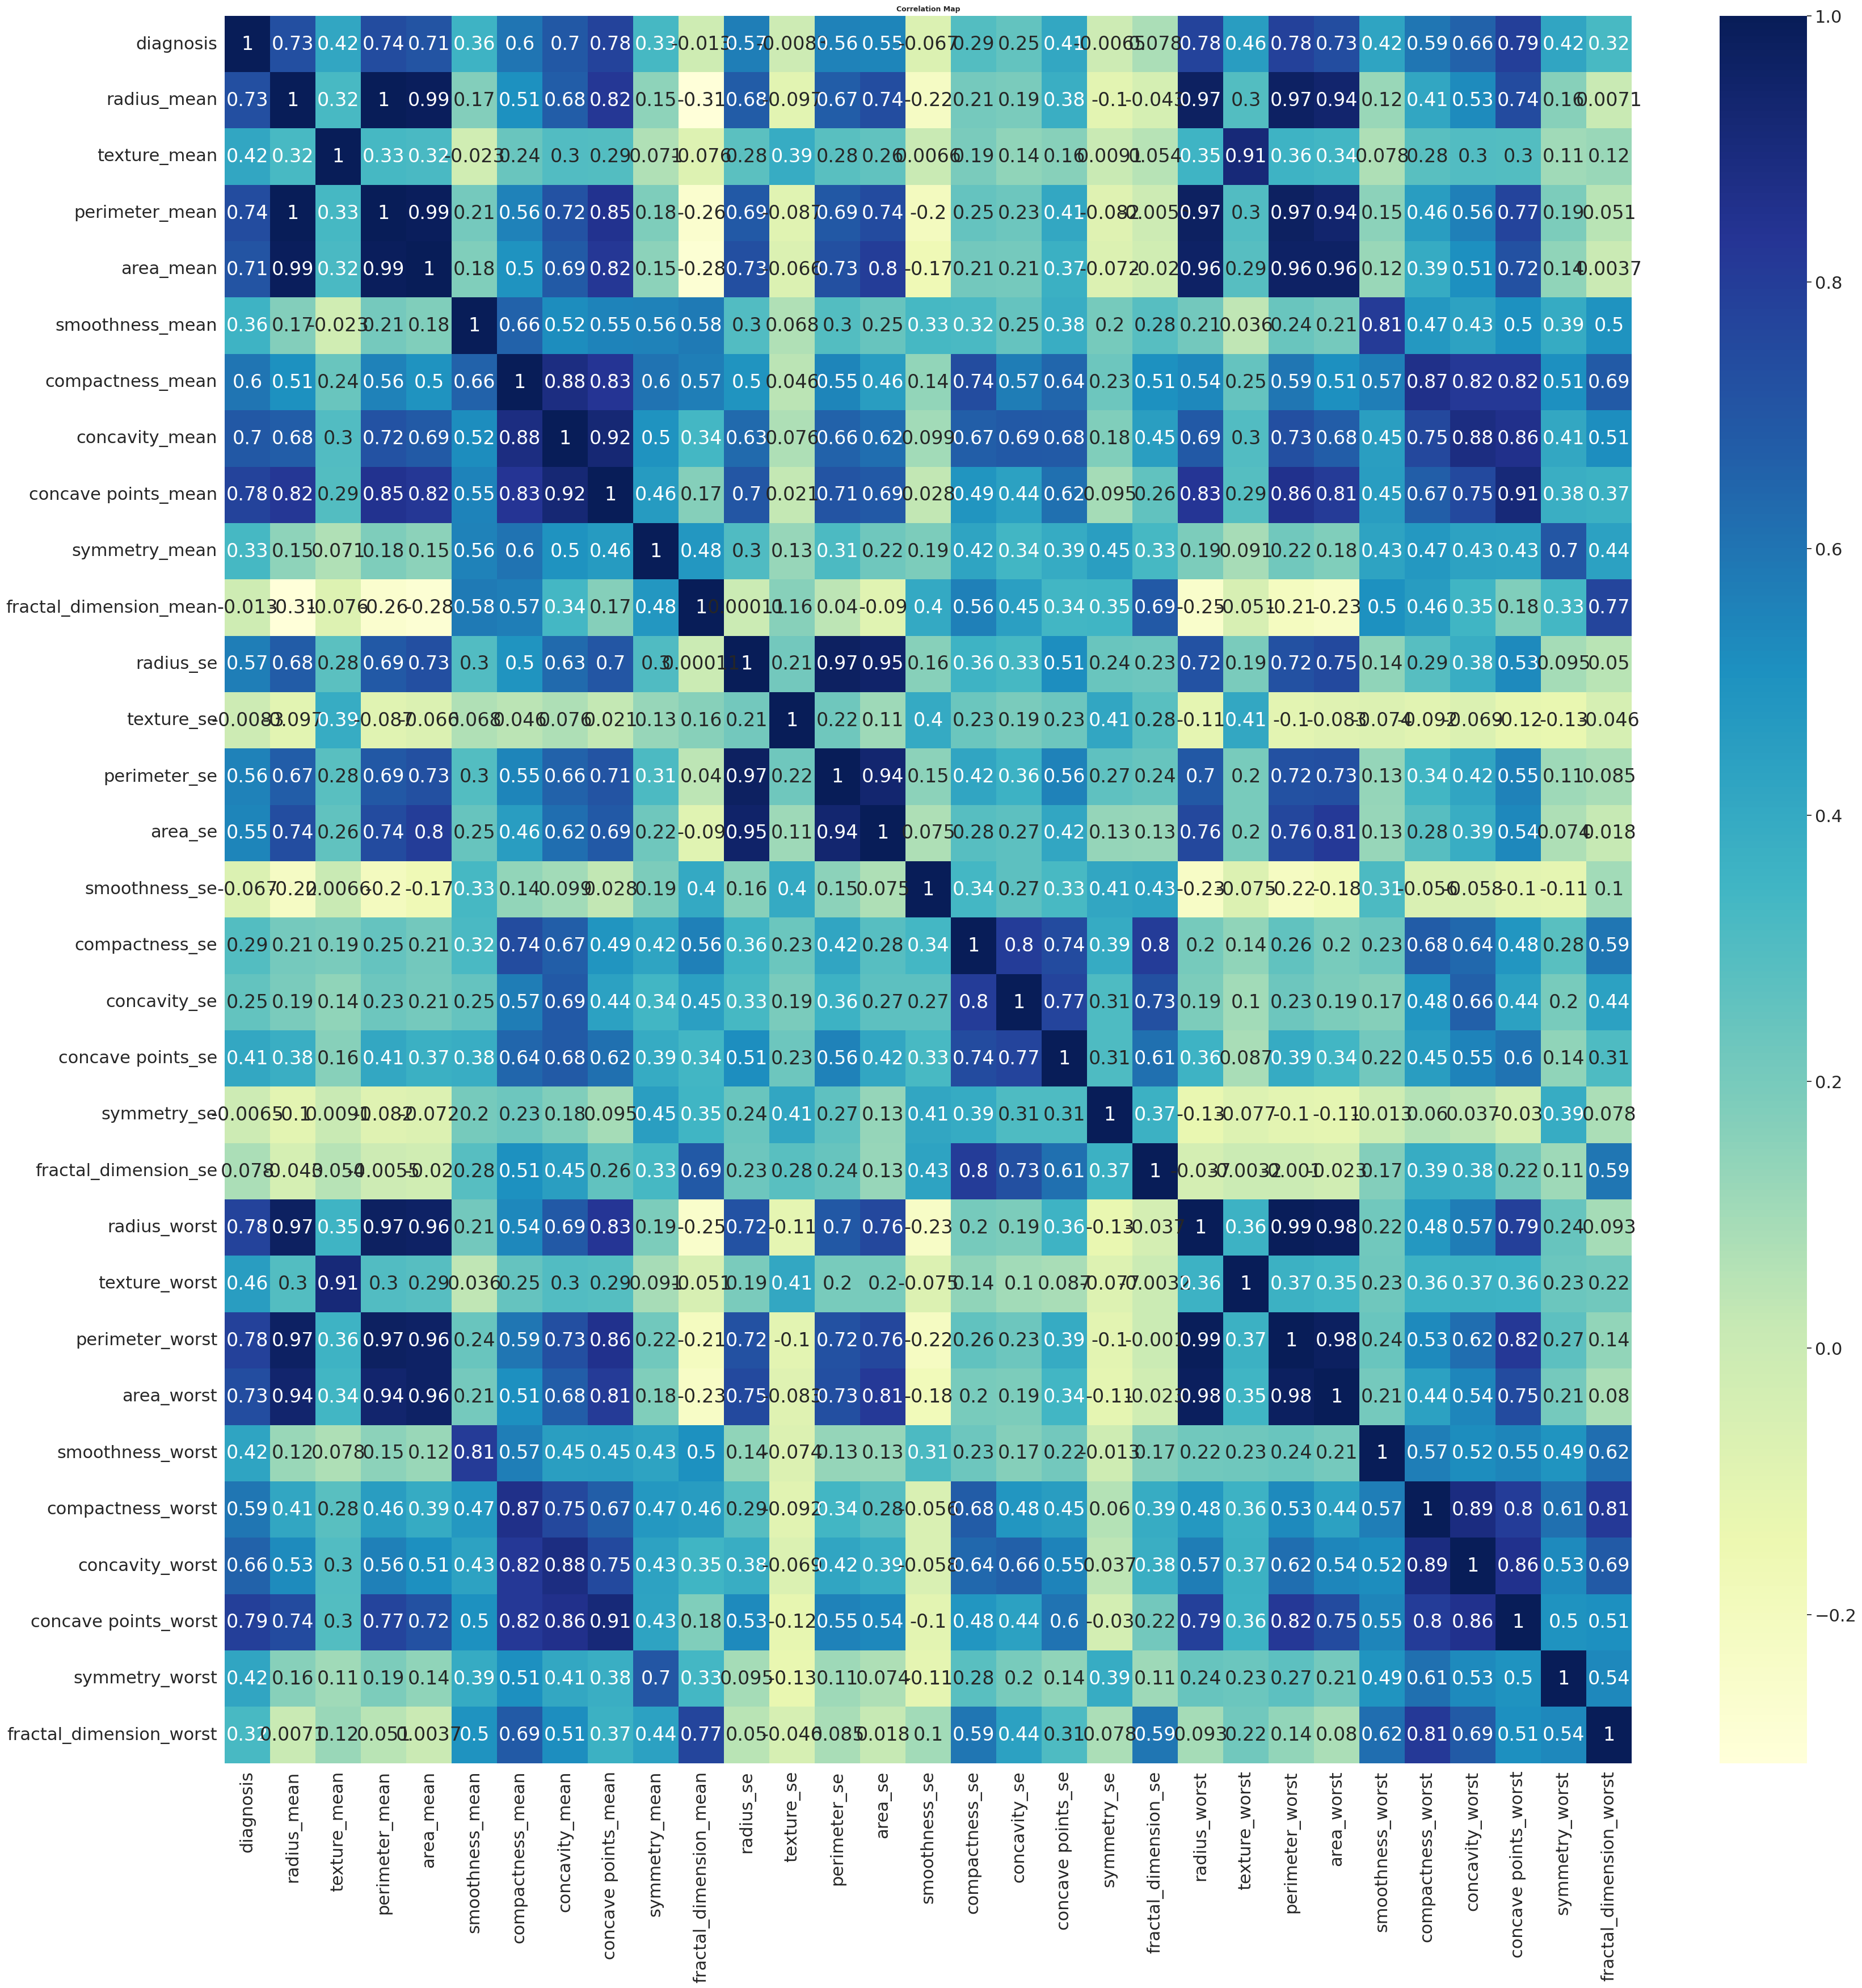

In [45]:
corr = df.corr()
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=9)

In [46]:
corr[abs(corr['diagnosis']) > 0.59].index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

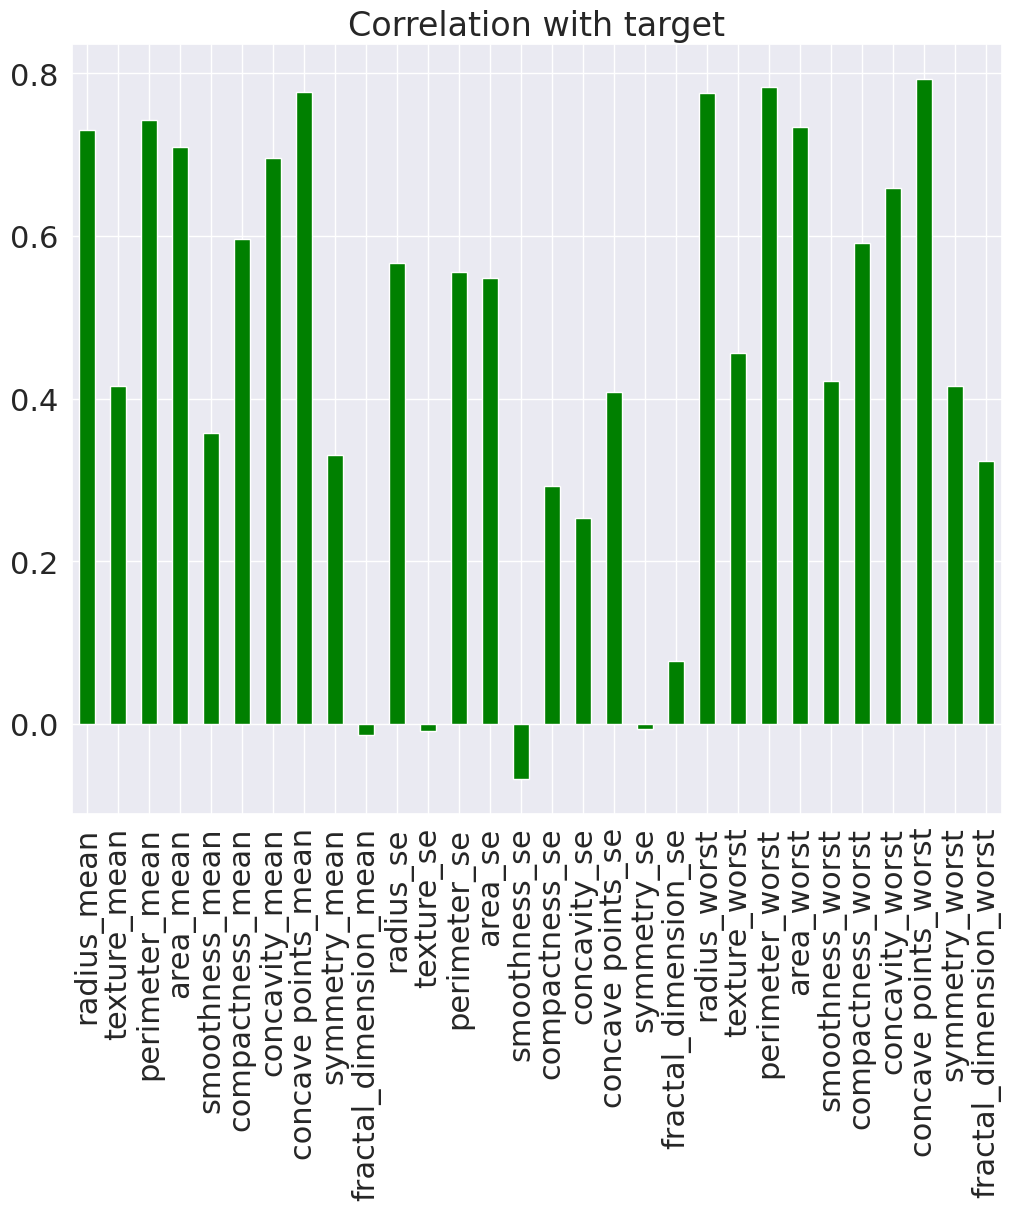

In [47]:
df.drop('diagnosis', axis=1).corrwith(df.diagnosis).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target",color="green");

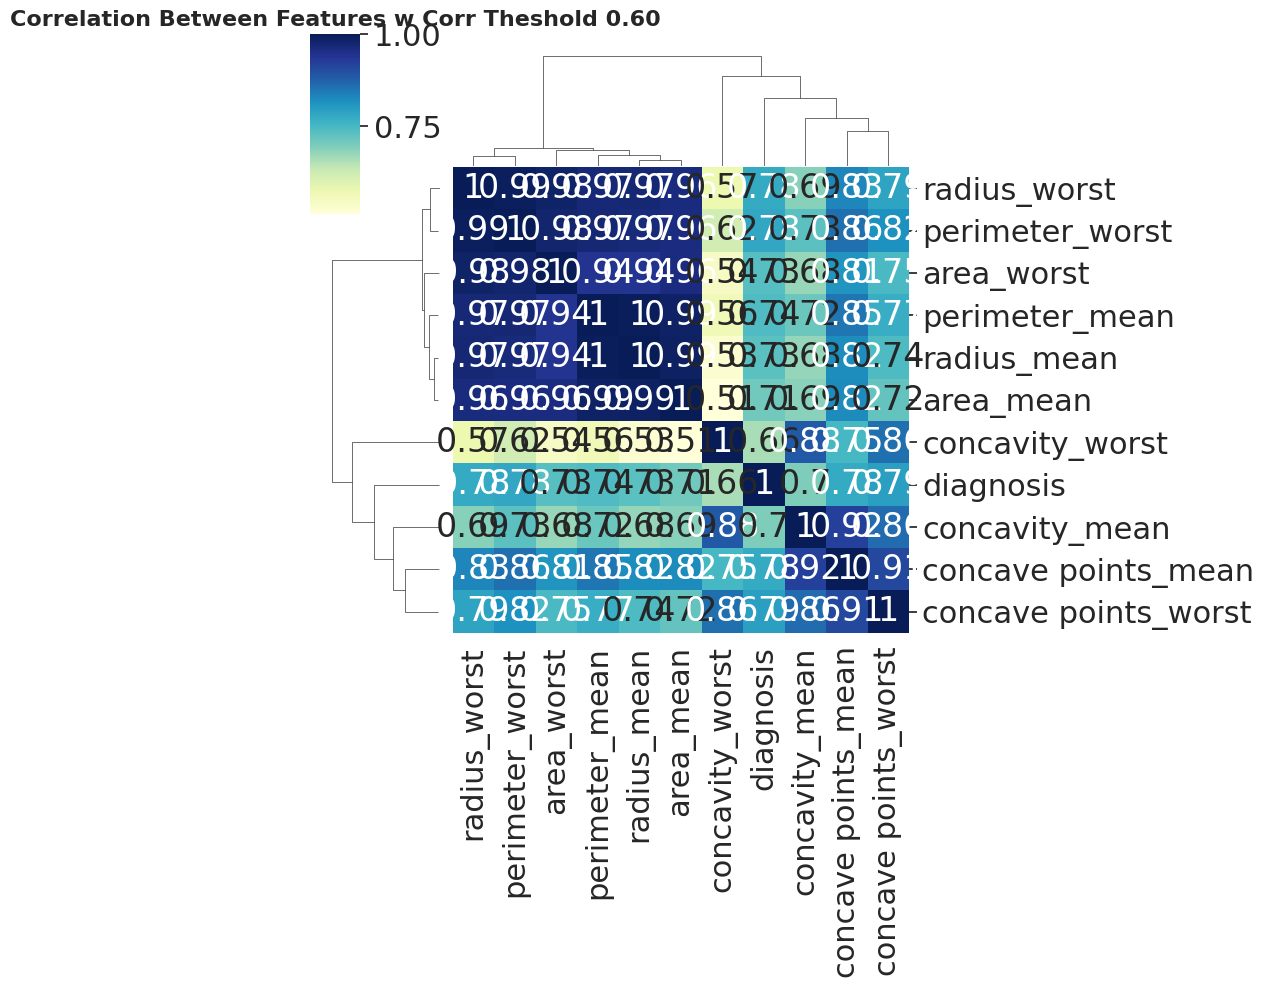

In [49]:
corr_matrix = df.corr()
threshold = 0.60
filtre = np.abs(corr_matrix["diagnosis"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(), annot = True, cmap="YlGnBu")
plt.figure(figsize=(40,40))
plt.title("Correlation Between Features w Corr Theshold 0.60", fontweight = "bold", fontsize=16)
plt.show()

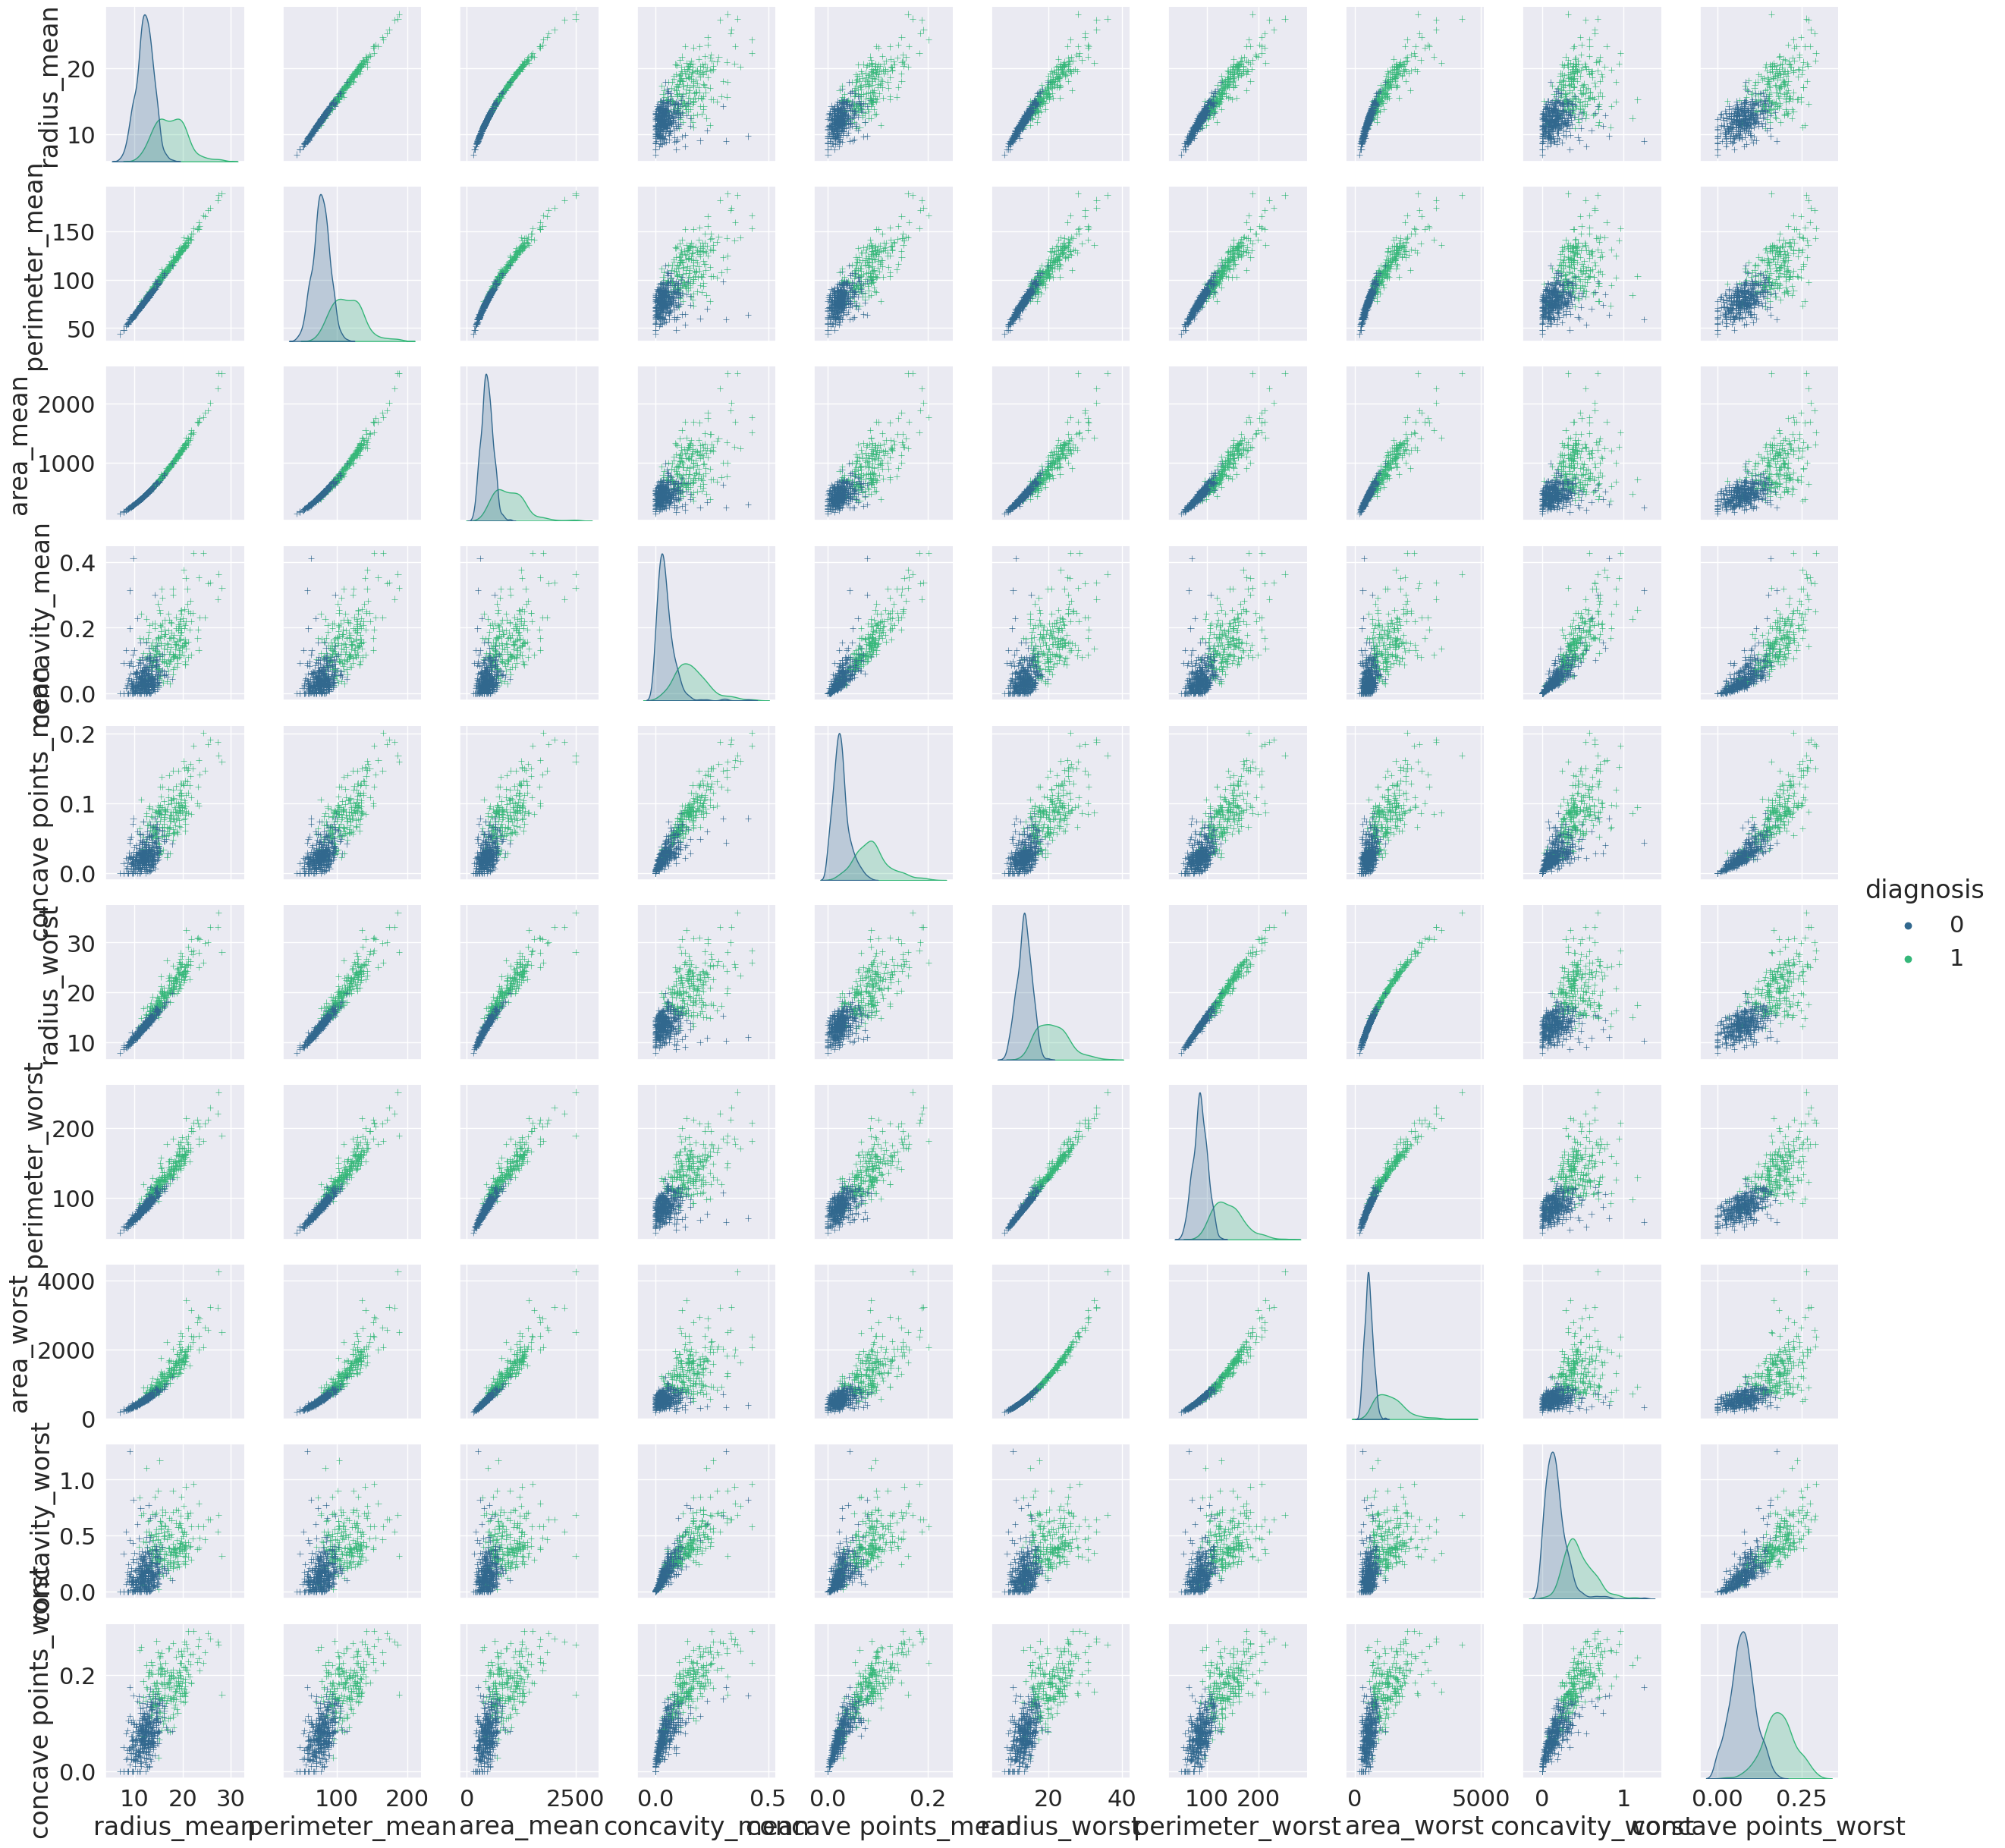

In [50]:
#pair plot
sns.pairplot(df[corr_features], diag_kind = "kde", markers = "+", hue = "diagnosis", palette='viridis')
plt.show()

# ***Splitting the Data***

In [52]:
X = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

In [53]:
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [54]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [55]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

# ***Cross Validation***

K-Fold Cross Validation

In [56]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
model=RandomForestClassifier()
from sklearn import tree
kfold_validation=KFold(n_splits=10, random_state = 42, shuffle=True)

In [57]:
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.96491228 0.96491228 0.98245614 0.98245614 0.96491228 0.94736842
 0.96491228 0.98245614 0.96491228 0.94642857]
0.9665726817042606


# ***Random Forest***

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

pred_prob1 = classifier.predict_proba(X_test)
from sklearn.metrics import roc_auc_score

#AUC scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

print(" AUC Score:", auc_score1)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))


Accuracy for training set for Random Forest = 1.0
Accuracy for test set for Random Forest = 0.9532163742690059
 AUC Score: 0.9966196355085245
[[104   4]
 [  4  59]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



# ***Logistics Regression***

In [59]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs')
classifier.fit(X_train, y_train)

start = time.time()

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, precision_score
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
pred_prob2 = classifier.predict_proba(X_test)
from sklearn.metrics import roc_auc_score

#AUC scores
auc_score2 = roc_auc_score(y_test, pred_prob1[:,1])

print(" AUC Score:", auc_score1)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
end = time.time()
diff = end - start
print('Execution time:', diff)

 AUC Score: 0.9966196355085245

Accuracy for training set for Logistic Regression = 0.9422110552763819
Accuracy for test set for Logistic Regression = 0.9532163742690059
[[102   6]
 [  2  61]]


              precision    recall  f1-score   support

           0       0.98      0.94      0.96       108
           1       0.91      0.97      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171

Execution time: 0.025915145874023438


# ***Support Vector Machine***

In [61]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [62]:
y_pred = svclassifier.predict(X_test)

print('Accuracy for training set for SVM = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for SVM = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))
pred_prob3 = classifier.predict_proba(X_test)
from sklearn.metrics import roc_auc_score

#AUC scores
auc_score3 = roc_auc_score(y_test, pred_prob1[:,1])

print(" AUC Score:", auc_score1)

Accuracy for training set for SVM = 0.9422110552763819
Accuracy for test set for SVM = 0.9532163742690059
[[103   5]
 [  2  61]]


              precision    recall  f1-score   support

           0       0.98      0.95      0.97       108
           1       0.92      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

 AUC Score: 0.9966196355085245


In [63]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [65]:
y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
pred_prob4 = classifier.predict_proba(X_test)
from sklearn.metrics import roc_auc_score

#AUC scores
auc_score4 = roc_auc_score(y_test, pred_prob1[:,1])

print(" AUC Score:", auc_score1)

[[107   1]
 [ 18  45]]


              precision    recall  f1-score   support

           0       0.86      0.99      0.92       108
           1       0.98      0.71      0.83        63

    accuracy                           0.89       171
   macro avg       0.92      0.85      0.87       171
weighted avg       0.90      0.89      0.88       171

 AUC Score: 0.9966196355085245


# ***LighttGBM***

In [66]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label = y_train)
params = {}

clf = lgb.train(params, d_train, 100)
#Prediction
y_pred = clf.predict(X_test)
#convert into binary values
for i in range(0, len(y_pred)):
    if y_pred[i]>= 0.5:       # setting threshold to .5
       y_pred[i]=1
    else:
       y_pred[i]=0

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = clf.predict(X_train)
for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:
       y_pred_train[i]=0

cm_train = confusion_matrix(y_pred_train, y_train)
print(confusion_matrix(y_test, y_pred))
pred_prob5 = classifier.predict_proba(X_test)
from sklearn.metrics import roc_auc_score

#AUC scores
auc_score5 = roc_auc_score(y_test, pred_prob1[:,1])

print(" AUC Score:", auc_score1)
print()
print('Accuracy for training set for LightGBM = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for LightGBM = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3978
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] Start training from score 0.374372
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

# ***ROC***

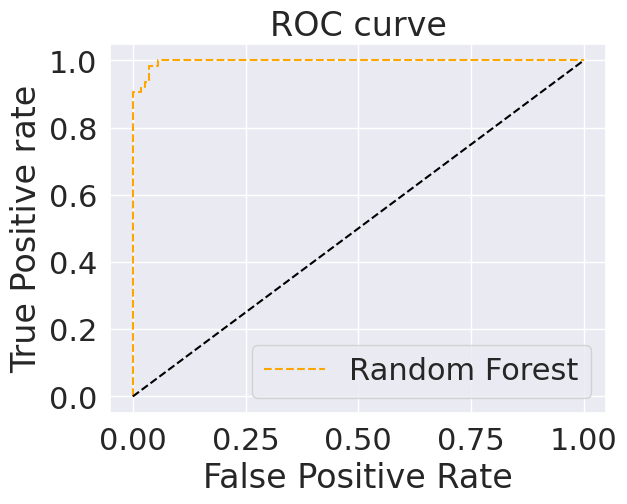

In [67]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

#ROC curve for TPR=FPR
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
#Plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
#title
plt.title('ROC curve')
#x-label
plt.xlabel('False Positive Rate')
#y-label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

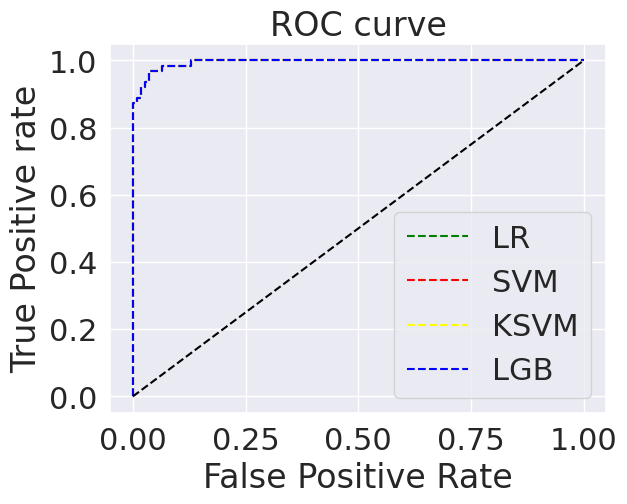

In [68]:
from sklearn.metrics import roc_curve


fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
#ROC curve for TPR=FPR
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
#Plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='LR')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='SVM')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='KSVM')
plt.plot(fpr5, tpr5, linestyle='--',color='blue', label='LGB')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
#title
plt.title('ROC curve')
#x-label
plt.xlabel('False Positive Rate')
#y-label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();